In [1]:
import pandas as pd
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

### Ingesting the data

In [3]:
df = pd.read_csv('TRAIN_DATA.csv')

In [ ]:
df.head()

In [ ]:
list(df)

In [ ]:
df.describe()

### Splitting the Data into Testing and Training

In [3]:
len(df)

104792

In [4]:
len(df) /2 

52396.0

In [4]:
df1 = df[:52396]

In [ ]:
df2 = df[52396:]

In [6]:
df1.to_csv('trainData_set1.csv')

In [ ]:
df2.to_csv('trainData_set2.csv')

In [ ]:
df1.describe()

In [ ]:
list(df1)

In [ ]:
df1['BID'].plot(kind='line', figsize=(17,5));

### Adjust Date Time Column

In [5]:
time = pd.to_timedelta( df1['TIME'])

In [6]:
time.iloc[0]

Timedelta('0 days 10:59:32.944000')

In [7]:
tradeDate = pd.to_datetime(df1['TRADEDATE'],format='%Y%m%d')

In [8]:
dateTime = pd.to_datetime(tradeDate + time)

In [9]:
dateTime.iloc[0]

Timestamp('2017-07-03 10:59:32.944000')

In [10]:
dateTime.iloc[1] - dateTime.iloc[0]

Timedelta('0 days 00:00:02.994000')

In [11]:
df1['DATETIME'] = dateTime

/Users/hussainmohammadyousuf/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df1['DATETIME_20'] = df1['DATETIME'].shift(10)

/Users/hussainmohammadyousuf/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
df2 = df1.dropna()

In [18]:
df2['DATETIME_20d'] = df2['DATETIME'] - df1['DATETIME_20']

/Users/hussainmohammadyousuf/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df2['DATETIME_20d'].describe()

count                     52386
mean     0 days 00:07:45.225983
std      0 days 02:20:49.745938
min             0 days 00:00:00
25%      0 days 00:00:23.649000
50%      0 days 00:00:47.482000
75%      0 days 00:01:21.217500
max      3 days 17:30:38.435000
Name: DATETIME_20d, dtype: object

In [13]:
df3 = df1.drop(columns=['TRADEDATE','TIME'])

### Perform One-Hot Encoding of Categorical Variables

In [14]:
# Number of each type of column
df1.dtypes.value_counts()

int64             27
float64           10
object             6
datetime64[ns]     1
dtype: int64

In [15]:
# Number of each type of column
df3.dtypes.value_counts()

int64             26
float64           10
object             5
datetime64[ns]     1
dtype: int64

In [16]:
# one-hot encoding of categorical variables
train = pd.get_dummies(df3)

print('Training Features shape: ', train.shape)


Training Features shape:  (52396, 62)


In [ ]:
df1.shape

In [ ]:
train.shape

### Understand the distirbution of the indicative Directions

In [22]:
ind_up = train.groupby(by='TICKDIR_UP').count()['BID']
ind_up

TICKDIR_UP
0    50731
1     1665
Name: BID, dtype: int64

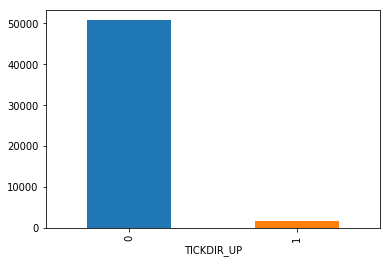

In [24]:
ind_up.plot(kind='bar');

In [25]:
ind_down = train.groupby(by='TICKDIR_DOWN').count()['BID']
ind_down

TICKDIR_DOWN
0    50711
1     1685
Name: BID, dtype: int64

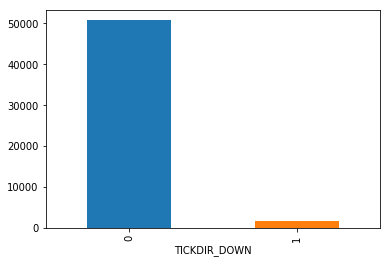

In [26]:
ind_down.plot(kind='bar');

In [27]:
last_down = train.groupby(by='LASTTICKDIR_DOWN').count()['BID']
last_down

LASTTICKDIR_DOWN
0    38767
1    13629
Name: BID, dtype: int64

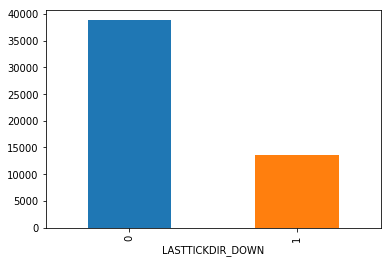

In [28]:
last_down.plot(kind='bar');

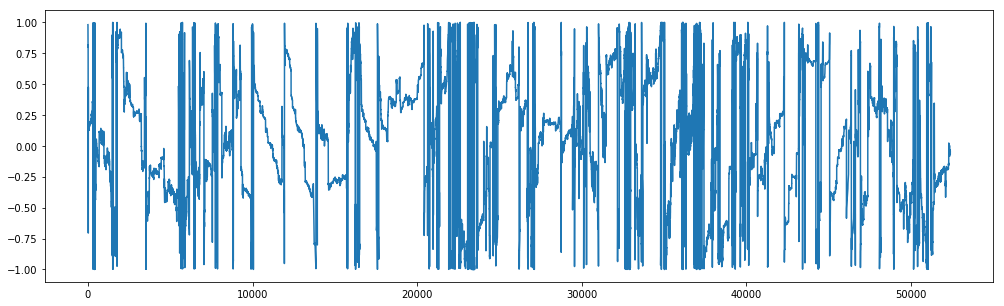

In [29]:
train.BIDASKIMBALANCE.plot(kind='line',figsize=(17,5));

In [33]:
flat_subset = train.loc[train['TICKDIR_FLAT'] == 0]

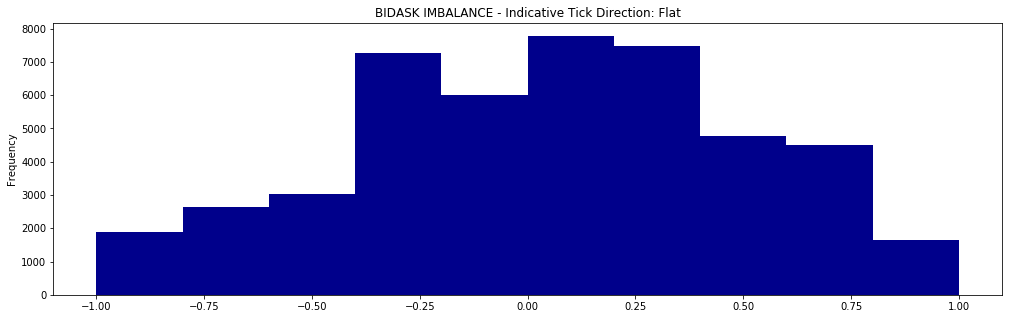

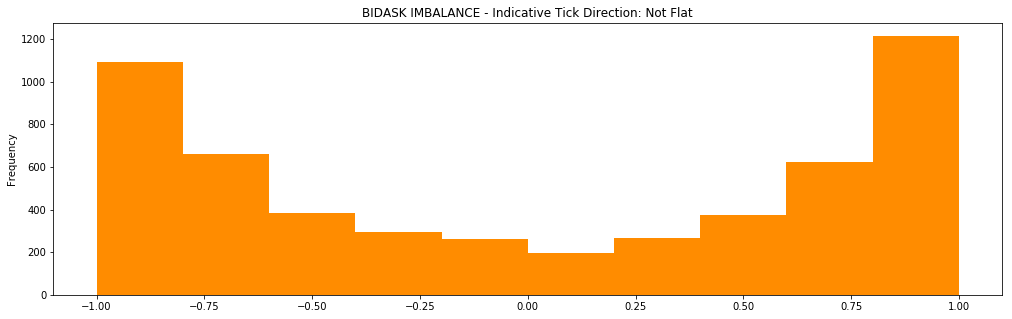

In [54]:
flat_subset = train.loc[train['TICKDIR_FLAT'] == 1]
flat_subset.BIDASKIMBALANCE.plot(kind='hist',figsize=(17,5), color='darkblue',
                                 title='BIDASK IMBALANCE - Indicative Tick Direction: Flat');
plt.show()
flat_subset = train.loc[train['TICKDIR_FLAT'] == 0]
flat_subset.BIDASKIMBALANCE.plot(kind='hist',figsize=(17,5), color='darkorange',
                                title='BIDASK IMBALANCE - Indicative Tick Direction: Not Flat');
plt.show()

In [36]:
x = flat_subset.BIDASKIMBALANCE.describe()

count    5367.000000
mean        0.009709
std         0.735875
min        -0.999893
25%        -0.740132
50%        -0.006186
75%         0.770429
max         0.999890
Name: BIDASKIMBALANCE, dtype: float64

### Distribution of the Data when the Indicative Tick Direction is Up

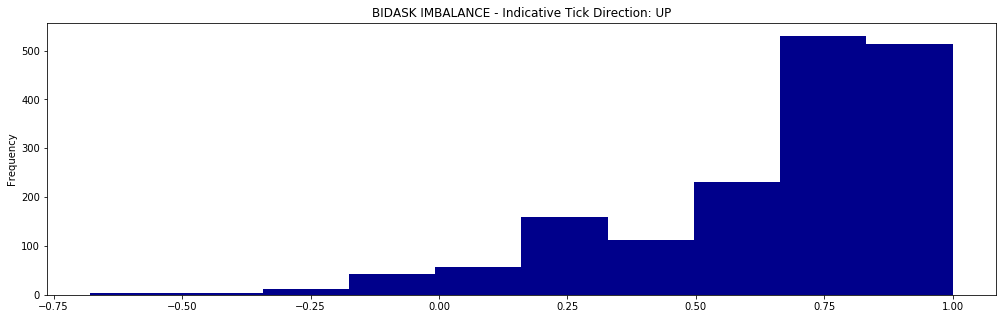

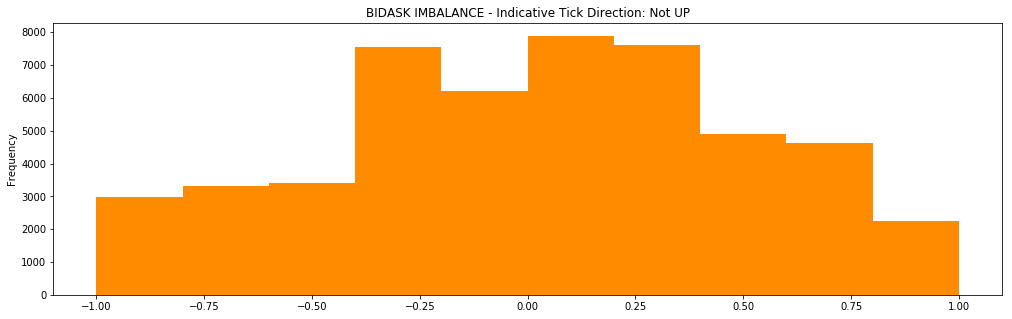

In [60]:
subset = train.loc[train['TICKDIR_UP'] == 1]
subset.BIDASKIMBALANCE.plot(kind='hist',figsize=(17,5), color='darkblue',
                                 title='BIDASK IMBALANCE - Indicative Tick Direction: UP');
plt.show()
subset = train.loc[train['TICKDIR_UP'] == 0]
subset.BIDASKIMBALANCE.plot(kind='hist',figsize=(17,5), color='darkorange',
                                title='BIDASK IMBALANCE - Indicative Tick Direction: Not UP');
plt.show()